# 2. Using Diamonds Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

## Decision Tree

In [5]:
%%time
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7102335928809789
Precision score:  0.7102335928809789
Recall score:  0.7102335928809789
F1 score:  0.7102335928809789
CPU times: total: 516 ms
Wall time: 504 ms


## Random Forest

In [6]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7851316277345198
Precision score:  0.7851316277345198
Recall score:  0.7851316277345198
F1 score:  0.7851316277345198
CPU times: total: 10.9 s
Wall time: 11.5 s


In [7]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7998702261772339
Precision score:  0.7998702261772339
Recall score:  0.7998702261772339
F1 score:  0.7998702261772339
CPU times: total: 8.89 s
Wall time: 2.93 s


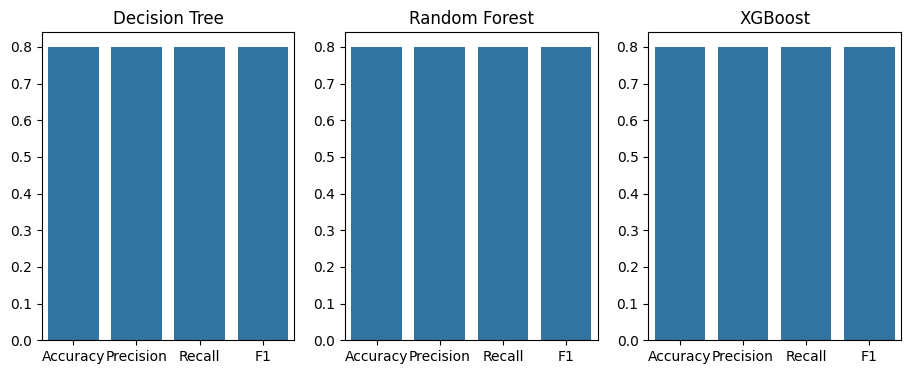

In [8]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()